# Speed-up and Efficiency

The following code measures the execution times of a certain program with different numbers of threads, and calculates speed-up and efficiency. In the first half we make our calculations based on the program, which measures execution time on the algorithm only. In the second half we make the exact same calculations, but we measure the execution time of the entire program. 

## Which program do you want to test ?

In the following code line, replace the last word `pi` with the program name you want to test. Then run all the code lines (and be patient). 

These are your options:
- pi
- jacobi
- fibonacci
- findprime
- mandelbrot
- quicksort
- mergesort
- bubblesort
- selectionsort
- matrixmultiplication

You can also test your own program. Check the readme file to find out how to do this.

In [71]:
%cd ~/performance/programs/matrixmultiplication

/home/jovyan/performance/programs/matrixmultiplication


### Measuring Elapsed Time on the Algorithm Only

In [72]:
# measure time with 10 repeats
import numpy as np
time = []
! ./timing.o 1 10 >/dev/null
time.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 4 10 >/dev/null
time.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 8 10 >/dev/null
time.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 16 10 >/dev/null
time.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 24 10 >/dev/null
time.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 32 10 >/dev/null
time.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 48 10 >/dev/null
time.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 64 10 >/dev/null
time.append(np.genfromtxt('/tmp/time.txt'))

In [73]:
# calculate speed-up and efficiency
threads = np.array([1,4,8,16,24,32,48,64])
speedup = np.ones(len(threads))*time[0]/np.array(time)
efficiency = np.ones(len(threads))*speedup/threads

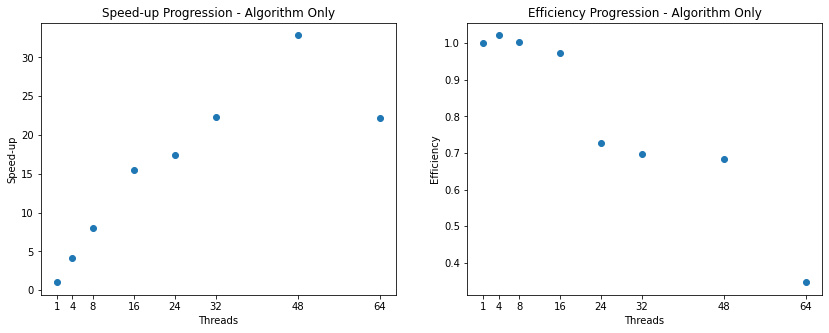

In [74]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# plot
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax[0].scatter(threads,speedup)
ax[0].set_xticks(threads)
ax[0].set_xticklabels(threads)
ax[0].set_ylabel('Speed-up')
ax[0].set_xlabel('Threads')
ax[0].set_title('Speed-up Progression - Algorithm Only')
ax[1].scatter(threads,efficiency)
ax[1].set_xticks(threads)
ax[1].set_xticklabels(threads)
ax[1].set_ylabel('Efficiency')
ax[1].set_xlabel('Threads')
ax[1].set_title('Efficiency Progression - Algorithm Only');

### Measuring Elapsed Time of the Full Program Run

In [75]:
# of full programm run: measure time with repeats=10
time2 = []
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 1 >/dev/null
time2.append(timeit_object.best)
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 4 >/dev/null
time2.append(timeit_object.best) 
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 8 >/dev/null
time2.append(timeit_object.best) 
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 16 >/dev/null
time2.append(timeit_object.best)
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 24 >/dev/null
time2.append(timeit_object.best)
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 32 >/dev/null
time2.append(timeit_object.best)
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 48 >/dev/null
time2.append(timeit_object.best)
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 64 >/dev/null
time2.append(timeit_object.best)

In [76]:
# calculate speed-up and efficiency
threads2 = np.array([1,4,8,16,24,32,48,64])
speedup2 = np.ones(len(threads2))*time2[0]/np.array(time2)
efficiency2 = np.ones(len(threads2))*speedup2/threads2

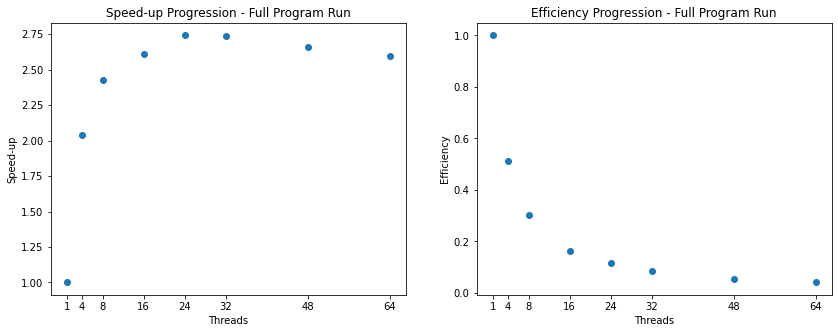

In [77]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# plot
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax[0].scatter(threads2,speedup2)
ax[0].set_xticks(threads2)
ax[0].set_xticklabels(threads)
ax[0].set_ylabel('Speed-up')
ax[0].set_xlabel('Threads')
ax[0].set_title('Speed-up Progression - Full Program Run')
ax[1].scatter(threads2,efficiency2)
ax[1].set_xticks(threads2)
ax[1].set_xticklabels(threads2)
ax[1].set_ylabel('Efficiency')
ax[1].set_xlabel('Threads')
ax[1].set_title('Efficiency Progression - Full Program Run');